In [1]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
from math import sqrt
import numpy as np
import seaborn as sns

In [2]:
data = pd.read_csv('assignment_data_clean.csv', index_col=0)

In [3]:
data.head()

month  net_new_listings  renewals  ads_bought  listing_revenue  \
user_id                                                                     
57502555  201811                 7        17          14           120.22   
2053618   201808                 1         5           1            28.29   
6787475   201809                 3         0           1            15.42   
2210108   201807                 3        55           2            37.32   
2786033   201807                 0         5           4            81.04   

          promo_revenue  total_revenue  
user_id                                 
57502555           0.00         120.22  
2053618           20.21          48.50  
6787475          132.99         148.41  
2210108           89.78         127.10  
2786033            0.00          81.04

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 470525 entries, 57502555 to 3158439
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   month             470525 non-null  int64  
 1   net_new_listings  470525 non-null  int64  
 2   renewals          470525 non-null  int64  
 3   ads_bought        470525 non-null  int64  
 4   listing_revenue   470525 non-null  float64
 5   promo_revenue     470525 non-null  float64
 6   total_revenue     470525 non-null  float64
dtypes: float64(3), int64(4)
memory usage: 28.7 MB


In [5]:
data.describe()

month  net_new_listings       renewals     ads_bought  \
count  470525.000000     470525.000000  470525.000000  470525.000000   
mean   201809.508808          2.523479       8.260186       2.663042   
std         1.687948         10.160131      51.657192      51.765132   
min    201807.000000          0.000000       0.000000       0.000000   
25%    201808.000000          0.000000       1.000000       0.000000   
50%    201810.000000          1.000000       2.000000       0.000000   
75%    201811.000000          2.000000       6.000000       0.000000   
max    201812.000000       1763.000000    7716.000000    7924.000000   

       listing_revenue  promo_revenue  total_revenue  
count    470525.000000  470525.000000  470525.000000  
mean          6.323377       6.859804      13.183181  
std          47.621371      99.327872     117.999593  
min         -82.640000  -16999.530000  -16999.530000  
25%           0.000000       0.000000       0.000000  
50%           0.000000       0.000000       0.000000  
75%           0.000000       0.000000       0.000000  
max        6736.670000   54703.610000   57680.000000

In [33]:
# Gropuping the data by month.
monthly_data = data.groupby(['month']).sum().reset_index()

In [34]:
monthly_data.describe()

month  net_new_listings       renewals     ads_bought  \
count       6.000000          6.000000       6.000000       6.000000   
mean   201809.500000     197893.333333  647770.666667  208838.000000   
std         1.870829      18760.739481   22426.521573   15240.024816   
min    201807.000000     168779.000000  629823.000000  197714.000000   
25%    201808.250000     189466.500000  633912.750000  197903.750000   
50%    201809.500000     198768.000000  635738.000000  200978.500000   
75%    201810.750000     209160.750000  659882.500000  217716.750000   
max    201812.000000     222054.000000  684090.000000  233182.000000   

       listing_revenue  promo_revenue  total_revenue  
count         6.000000       6.000000   6.000000e+00  
mean     495884.500000  537951.520000   1.033836e+06  
std       38866.861319   82206.531211   1.009292e+05  
min      436306.550000  471978.850000   9.082854e+05  
25%      486127.117500  494758.485000   9.826119e+05  
50%      494583.630000  501991.205000   1.005431e+06  
75%      506141.760000  549944.665000   1.094553e+06  
max      556530.440000  693471.130000   1.184602e+06

Text(0.5, 1.0, 'New listings Per Month')

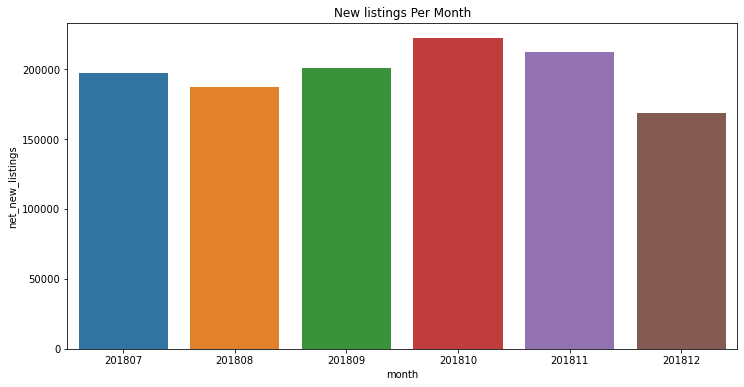

In [35]:
plt.figure(figsize=(12, 6))
sns.barplot(x="month", y="net_new_listings", data=monthly_data).set_title('New listings Per Month')

Text(0.5, 1.0, 'Renewals Per Month')

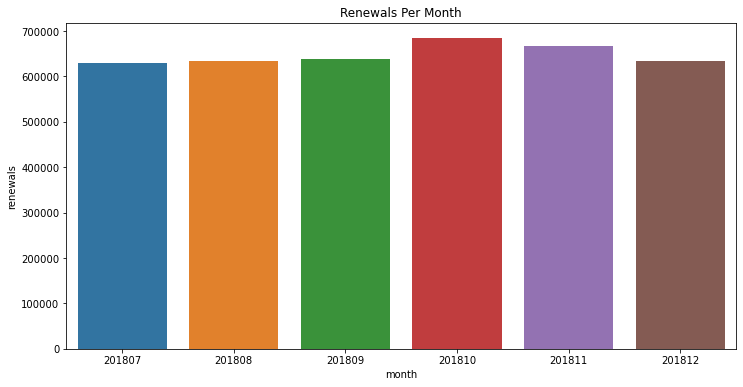

In [40]:
plt.figure(figsize=(12, 6))
sns.barplot(x="month", y="renewals", data=monthly_data).set_title('Renewals Per Month')

Text(0.5, 1.0, 'Ads Bought Per Month')

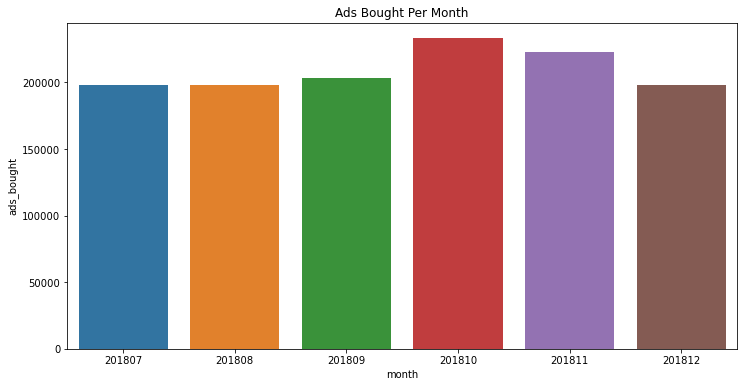

In [31]:
plt.figure(figsize=(12, 6))
sns.barplot(x="month", y="ads_bought", data=monthly_data).set_title('Ads Bought Per Month')

Text(0.5, 1.0, 'Ads Bought Per Month')

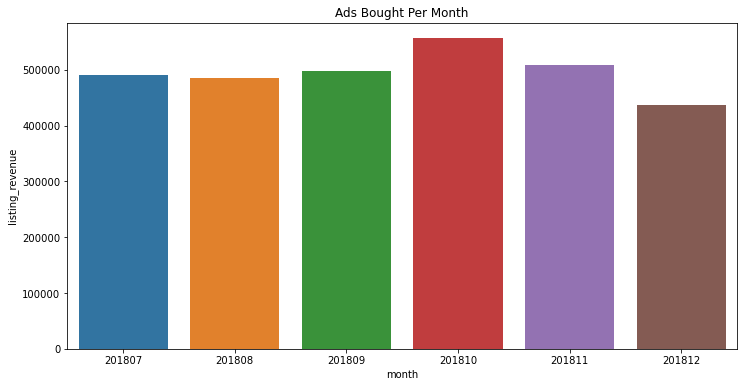

In [36]:
plt.figure(figsize=(12, 6))
sns.barplot(x="month", y="listing_revenue", data=monthly_data).set_title('Listing Revenue Per Month')

Text(0.5, 1.0, 'promo_revenue Per Month')

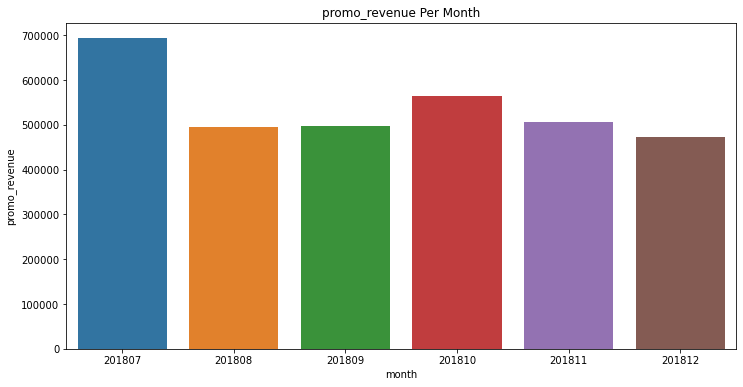

In [37]:
plt.figure(figsize=(12, 6))
sns.barplot(x="month", y="promo_revenue", data=monthly_data).set_title('Promo Revenue Per Month')

Text(0.5, 1.0, 'Ads Bought Per Month - Trend Line')

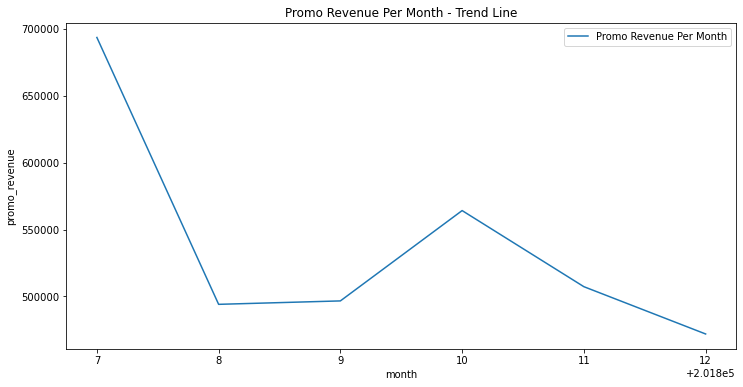

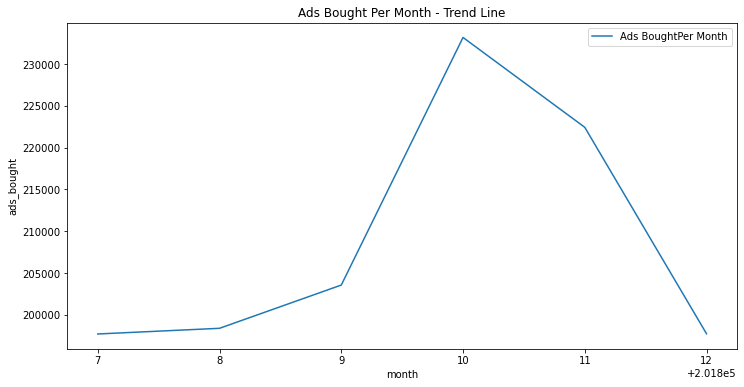

In [107]:
plt.figure(figsize=(12, 6))
sns.lineplot(x = "month", y = "promo_revenue", data = monthly_data,
     label = 'Promo Revenue Per Month').set_title('Promo Revenue Per Month - Trend Line')
plt.figure(figsize=(12, 6))
sns.lineplot(x = "month", y = "ads_bought", data = monthly_data,
     label = 'Ads BoughtPer Month').set_title('Ads Bought Per Month - Trend Line')

In [111]:
# Checking correlation between Ads Bought per month and Promo Revenue per month
correlation = monthly_data['promo_revenue'].corr(monthly_data['ads_bought'])
print("Correlation between Ads Bought per month and Promo Revenue per month equals",correlation)


Correlation between Ads Bought per month and Promo Revenue per month equals -0.016137195339272884


Text(0.5, 1.0, 'total_revenue Per Month')

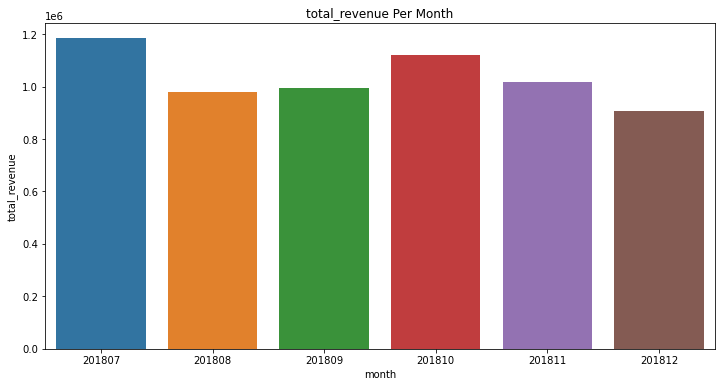

In [38]:
plt.figure(figsize=(12, 6))
sns.barplot(x="month", y="total_revenue", data=monthly_data).set_title('Total Revenue Per Month')

Text(0.5, 1.0, 'Total Revenue Per Month - Trend Line')

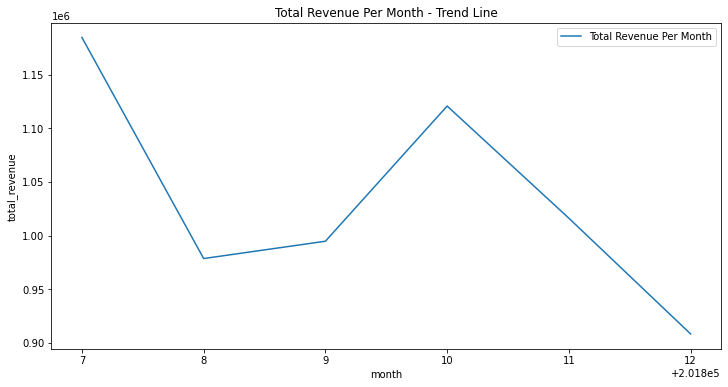

In [104]:
plt.figure(figsize=(12, 6))
sns.lineplot(x = "month", y = "total_revenue", data = monthly_data,
     label = 'Total Revenue Per Month').set_title('Total Revenue Per Month - Trend Line')

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(x = "month", y = "total_revenue", data = monthly_data,
     label = 'Total Revenue Per Month').set_title('Total Revenue Per Month - Trend Line')

In [58]:
#Prepering the response variables
total_revenue = monthly_data.iloc[:,-1] 
total_revenue

0    1184602.12
1     978578.16
2     994713.21
3    1120688.17
4    1016149.06
5     908285.40
Name: total_revenue, dtype: float64

In [62]:
 #Prepering the explanatory variables
y_data = monthly_data.iloc[:,1:-1]
y_data

net_new_listings  renewals  ads_bought  listing_revenue  promo_revenue
0            197103    629823      197714        491130.99      693471.13
1            186921    634107      198392        484459.16      494119.00
2            200433    637369      203565        498036.27      496676.94
3            222054    684090      233182        556530.44      564157.73
4            212070    667387      222434        508843.59      507305.47
5            168779    633848      197741        436306.55      471978.85

In [76]:
#Checking the correlation of the explanatory variables
corr_P = y_data.corr("pearson")
corr_P

net_new_listings  renewals  ads_bought  listing_revenue  \
net_new_listings          1.000000  0.807454    0.849214         0.964964   
renewals                  0.807454  1.000000    0.996305         0.804305   
ads_bought                0.849214  0.996305    1.000000         0.835536   
listing_revenue           0.964964  0.804305    0.835536         1.000000   
promo_revenue             0.307687 -0.053572   -0.016137         0.300171   

                  promo_revenue  
net_new_listings       0.307687  
renewals              -0.053572  
ads_bought            -0.016137  
listing_revenue        0.300171  
promo_revenue          1.000000

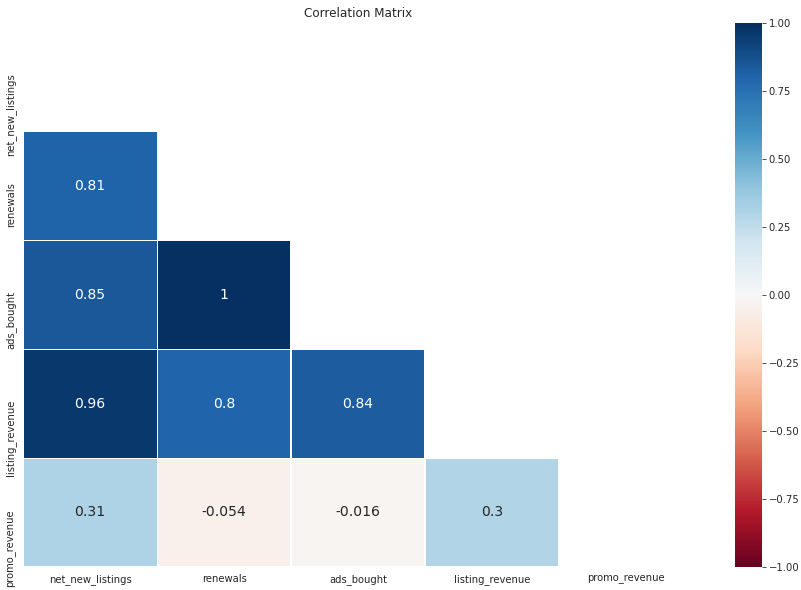

In [90]:
# Displaing the correlation matrix
corr_matrix_half = corr_P.where(np.tril(np.ones(corr_P.shape),k=-1).astype(np.bool))
corr_matrix_half
with sns.axes_style('white'):
    f,ax = plt.subplots(figsize=(15,10))
    ax= sns.heatmap(corr_matrix_half,vmin=-1, vmax=1, cmap='RdBu', linewidth =.1,
                    annot=True, annot_kws={'fontsize':14}).set_title('Correlation Matrix')


In [ ]:
# Next steps propose a prediction model e.g., linear regression model or simple rolling average and try to predicts revenues for next month.
# The same could be done with other variables e.g., ads_bought or new_listings.
